# Projet : programmation statistique avec Python
---

- BUT 2 - VCOD/EMS
- Année académique 2024/2025
- Adresse :
    - Centre Borelli – Université de Paris Cité
    - IUT Paris Rives de Seine
- Mail : amine.meddour@u-paris.fr
---
- Remise du projet :
**Vous devez envoyer votre notebook (ou script python) + préparer un support de présentation sur powerpoint pour présenter votre travail    au plus tard le 8 janvier 2025 avant minuit. (Important : 3 étudiants maximum par groupe)**.
---

## Objectif :

- Ce projet est un travail pratique sur données réelles. Il s'agit de mettre en place une analyse exploratoire du jeu de données de crédits décrivant les détails financiers et bancaires des clients d’une banque en utilisant un certain nombre de packages Python (pandas, numpy,scipy, matplotlib et scikit-learn,..).

- Présentation du projet
    - Le notebook doit présenter de façon claire et concise:
    - l'objet de l'analyse
    - la description des données (individus/variables utilisées, variables supplémentaires etc.)
    - l'analyse proprement dite
    - les commentaires sur les résultats obtenus.
    - les commentaires sur le code utilisé.

**Vous devez envoyer votre notebook (ou script python) + préparer un support de présentation sur powerpoint pour présenter votre travail    au plus tard le 8 janvier 2025 avant minuit. (Important : 3 étudiants maximum par groupe)**.

###  Présentation des données
---

- **Données** : L'ensemble de données de crédits décrit les détails financiers et bancaires des clients et la tâche consiste à déterminer si le client est bon ou mauvais. L'hypothèse est que la tâche consiste à prédire si un client remboursera un prêt ou un crédit. L'ensemble de données comprend 1000 exemples et 20 variables, dont 7 numériques (entiers) et 13 catégorielles. La dernière colonne de la table fait référence à la variable cible : 1: bon client et 2: mauvais client.

- **Noms des variables** : (Statut du compte courant existant, Durée en mois, Historique de crédit, Objectif, Montant du crédit, Compte d'épargne, Emploi actuel depuis, Taux de versement en, pourcentage du revenu disponible, Statut personnel et sexe, Autres débiteurs,Résidence actuelle depuis, Propriété, Age en années, Autres plans de versement, Logement, Nombre de crédits existants dans cette banque, Travail, Nombre de personnes à charge, Téléphone, Travailleur étranger).

- Lors du chargement de la table, vous pouvez renommer les variables en utilisant la liste suivante :
columns = ['statut_compte', 'duree_mois', 'historique', 'objectif', 'montant', 'epargne', 'emploi', 'taux_versement', 'statut_sexe', 'autre_debiteurs', 'residence', 'propriete', 'age', 'plan_versement', 'logement', 'n_credit', 'travail', 'n_p_charge', 'tel', 'trav_etranger']

- y étant la variable cible (des labels) qui prend deux valeurs (1 et 2), 1:= désigne un bon client et 2 désigne un mauvais client.

- **Source et description des données Crédits** :

https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data


### Chargement et description des données

In [8]:
#In a Jupyter notebook, install with the command
!pip3 install -U ucimlrepo
# Restart the kernel and import the module ucimlrepo.

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import ucimlrepo

In [3]:
# Installer le package ucimlrepo

#pip install ucimlrepo
 

# Importer les données  

from ucimlrepo import fetch_ucirepo 
  
# Récupérer l'ensemble de données
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# Les données (sous forme de dataframes pandas) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 


In [6]:
# metadata 
#print(statlog_german_credit_data.metadata) 
  
# variable information 
#print(statlog_german_credit_data.variables) 
print(statlog_german_credit_data.variables[['name','description']])

           name                                        description
0    Attribute1                Status of existing checking account
1    Attribute2                                           Duration
2    Attribute3                                     Credit history
3    Attribute4                                            Purpose
4    Attribute5                                      Credit amount
5    Attribute6                              Savings account/bonds
6    Attribute7                           Present employment since
7    Attribute8  Installment rate in percentage of disposable i...
8    Attribute9                            Personal status and sex
9   Attribute10                         Other debtors / guarantors
10  Attribute11                            Present residence since
11  Attribute12                                           Property
12  Attribute13                                                Age
13  Attribute14                            Other installment p

## Partie 1 : Manipulation, analyse et visualisation des données statlog_german_credit_data
---

- Commencer par une étude exploratoire préliminaire
    - Chargement des données
    - Description des données
    - Visualisation: Représentations Graphiques , univariée et bivariée, croisement des variables
    - Scinder le dataset en deux sous ensemble data-qualitative et data-quantitative
- Etude exploratoire multidimensionnelles: ACP et classification de type CAH et k-means
    - Faire une acp sur la base des données data-quantitative
    - Faire un clustering avec k-means ou CAH et projeter les clusters sur le premier plan factoriel de l’acp
    - Faire une brève interprétation des résultats obtenus

## Partie2: Réorganisation et visualisation d'une matrice 
---
- L'objectif de cette partie est d'appliquer la fonction svd_1d sur une matrice X afin de mieux  réorganiser ses lignes et ses colonnes. Cette méthode nous permet de réordonner à la fois les lignes et les colonnes afin de visualiser les éléments de façon plus groupée.

- Le principe de la méthode svd_1d est d'approximer  de manière itérative les vecteurs singuliers associés à la plus grande valeur singulère de la matrice de la matrice X. 

-  En effet, afin de pouvoir réordonner les lignes et les colonnes de X pour avoir une strcture par blocs, il faut d'abord trier les vecteurs u et v, ensuite réorganisé les lignes en fonction du tri de u  et les colonnes de X du tri de v.

In [7]:
# Chargement des libraiies numpy, pands, matplolib, math et  random
import numpy as np
from numpy.linalg import norm
from random import normalvariate
from math import sqrt
#from scipy.io import loadmat
import matplotlib.pylab as plt
import pandas as pd

In [8]:
def randomUnitVector(n):
    unnormalized = [normalvariate(0, 1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]

In [9]:
def svd_1d(X, epsilon=1e-10):
    A = np.array(X)
    
    n, m = A.shape
    
    # Transformation de A en une  matrice stochastique de dimension (n+m) * (n+m)
    Dr = np.diag(A.sum(axis=1))
    Dc = np.diag(A.sum(axis=0))
    
    Dc_1 = np.linalg.inv(Dc)
    Dr_1 = np.linalg.inv(Dr)
    
    col1 = np.concatenate([np.zeros((n,n)), np.dot(Dc_1 , A.T)])
    col2 = np.concatenate([np.dot(Dr_1 , A), np.zeros((m,m))])
    
    S = np.concatenate([col1, col2], axis=1)
    
    # initialisation du vecteur currentV
    x = randomUnitVector(n+m)
    lastV = None
    currentV = x
    
    lastE = np.linalg.norm(currentV)

    # Itérations 
    iterations = 0
    while True:
        iterations += 1
        lastV = np.array(currentV)
        currentV = np.dot(S, lastV)
        currentV = currentV / norm(currentV)
        
        last_u = lastV[list(range(0,n))]
        last_v = lastV[list(range(n,n+m))]
        
        current_u = currentV[list(range(0,n))]
        current_v = currentV[list(range(n,n+m))]
        
        e_u = np.linalg.norm(current_u - last_u)
        e_v = np.linalg.norm(current_v - last_v)
        
        currentE = e_u + e_v
        
        d = abs(currentE - lastE)
        lastE = currentE
        
        if d <= epsilon:
            print("converged in {} iterations!".format(iterations))

            #u = currentV[range(0,n)]
            #v = currentV[range(n,n+m)]
            
            return current_u, current_v

### Questions :
---

Q1 : Expliquer les deux fonctions, randomUnitVector et svd_1d

Q2 : Créer une dataframe à partir de X en considérant le noms des lignes et colonnes?

- la matrice X donne une description de 16 villes américaines (les colonnes) décrites par 9 caractéristiques (les lignes), chaque cellule de X indique la présence 1 ou l'absence 0 d'une carctéristique dans une ville.

In [10]:
X = np.array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

columns=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P"]
index=["HighSchool", "AgricultCoop", "Railstation", "OneRoomSchool", "Veterinary", "NoDoctor", "NoWaterSupply",  "PoliceStation", "LandReallocation"]


Q3 : Visualiser la matrice X (utiliser la fonction  imshow de matplotlib), 

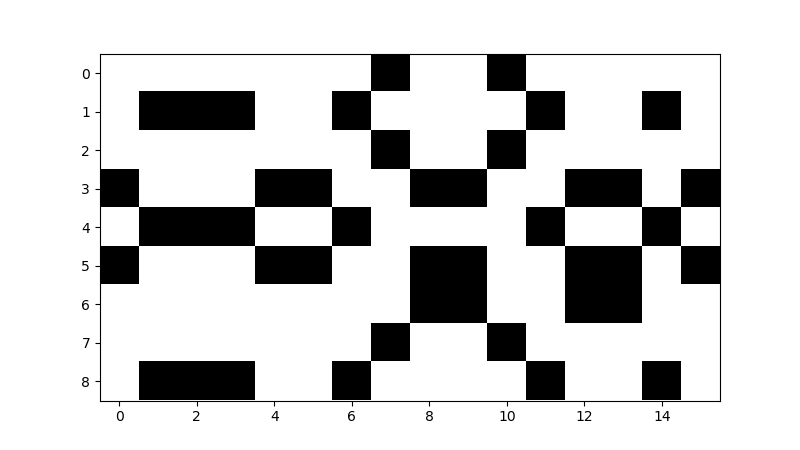

Q4: Ecrire la fonction Reordonner (aide : utiliser argsort() de numpy)
- qui prend en paramètres X,et ses vecteurs singuliers u et v obtenus à partir 
de svd_1d(X, epsilon=1e-10)
- et qui renvoie la matrice X réordonnée selon le tri de u et v

In [8]:
#%%script false --no-raise-error
def reordonner(X, u, v):
    """
        renvoie les lignes et les colonnes de X réorganisées  par rapport au tri des vecteurs  u et v
        utiliser argsort() pour trier les vecteurs u et v
    """
    
    à completer le code ici...
 
    return X_reordonnee

Q5:

- Claculer les deux premiers vecteurs singuliers de X u et v - (appeler la fonction R1svd)
- Réordonner X en fonction des tris de u et v- (appler la fonction Reordonner)
- Visualiser X réordnnée (avec imshow) pour avoir une matrice réorganiser par blocs
---
- Résultat attendu

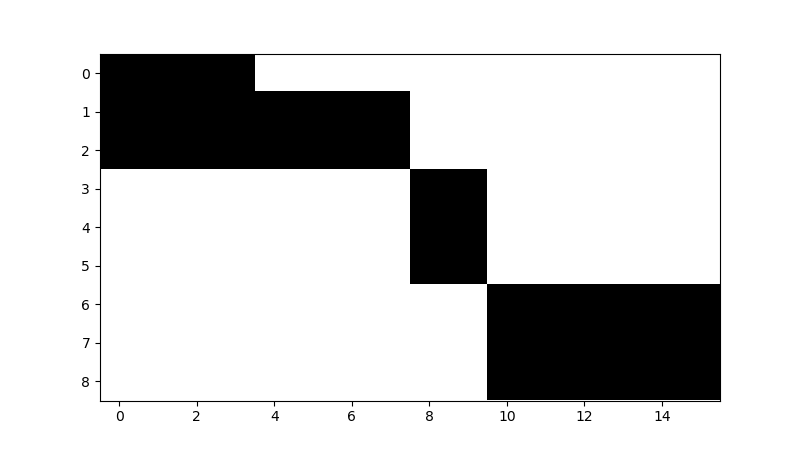

Q6:

- Calculer la matrice  de similarité entre les lignes de X, $SR=XX^T$, ($X^T$ est matrice transposée de X).
- Calculer la matrice de similarité entre les colonnes de X, $SC=X^TX$
- Construire la matrice
$
M= \begin{pmatrix}
SR & X\\
X^T & SC
\end{pmatrix} 
$ 
- Visualiser M reordonnée en fonction des tris de u et v.
---
- Résultat attendu
  
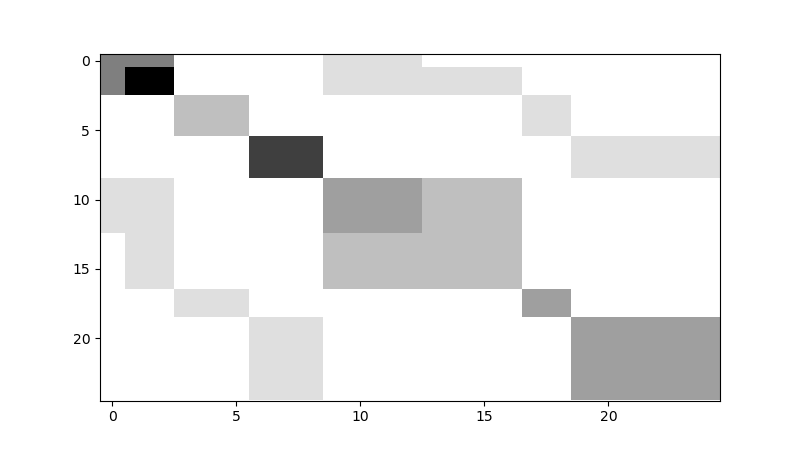
